## Regression Project: Boston House Prices

In [1]:
# Load libraries
import pandas as pd
import pandas
import numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
# from sklearn import cross_validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

C:\Users\Mohamad Hallak\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pandas.read_csv(url, delim_whitespace=True, names=names)
dataset.index += 1

In [3]:
dataset.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [4]:
# shape
dataset.shape

(506, 14)

In [5]:
# types
print(dataset.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [6]:
# descriptions, change precision to 2 places
pandas.set_option('precision', 3)
print(dataset.describe())


          CRIM       ZN    INDUS     CHAS      NOX       RM      AGE      DIS  \
count  506.000  506.000  506.000  506.000  506.000  506.000  506.000  506.000   
mean     3.614   11.364   11.137    0.069    0.555    6.285   68.575    3.795   
std      8.602   23.322    6.860    0.254    0.116    0.703   28.149    2.106   
min      0.006    0.000    0.460    0.000    0.385    3.561    2.900    1.130   
25%      0.082    0.000    5.190    0.000    0.449    5.886   45.025    2.100   
50%      0.257    0.000    9.690    0.000    0.538    6.208   77.500    3.207   
75%      3.677   12.500   18.100    0.000    0.624    6.623   94.075    5.188   
max     88.976  100.000   27.740    1.000    0.871    8.780  100.000   12.127   

           RAD      TAX  PTRATIO        B    LSTAT     MEDV  
count  506.000  506.000  506.000  506.000  506.000  506.000  
mean     9.549  408.237   18.456  356.674   12.653   22.533  
std      8.707  168.537    2.165   91.295    7.141    9.197  
min      1.000  187.00

In [7]:
# head
print(dataset.head(20))


     CRIM    ZN  INDUS  CHAS    NOX     RM    AGE    DIS  RAD    TAX  PTRATIO  \
1   0.006  18.0   2.31     0  0.538  6.575   65.2  4.090    1  296.0     15.3   
2   0.027   0.0   7.07     0  0.469  6.421   78.9  4.967    2  242.0     17.8   
3   0.027   0.0   7.07     0  0.469  7.185   61.1  4.967    2  242.0     17.8   
4   0.032   0.0   2.18     0  0.458  6.998   45.8  6.062    3  222.0     18.7   
5   0.069   0.0   2.18     0  0.458  7.147   54.2  6.062    3  222.0     18.7   
6   0.030   0.0   2.18     0  0.458  6.430   58.7  6.062    3  222.0     18.7   
7   0.088  12.5   7.87     0  0.524  6.012   66.6  5.561    5  311.0     15.2   
8   0.145  12.5   7.87     0  0.524  6.172   96.1  5.950    5  311.0     15.2   
9   0.211  12.5   7.87     0  0.524  5.631  100.0  6.082    5  311.0     15.2   
10  0.170  12.5   7.87     0  0.524  6.004   85.9  6.592    5  311.0     15.2   
11  0.225  12.5   7.87     0  0.524  6.377   94.3  6.347    5  311.0     15.2   
12  0.117  12.5   7.87     0

In [8]:
# B.Checking missing values in the full data (training and validation data)
X_full_missing_values_count = dataset.isnull().sum()
X_full_missing_values_count

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

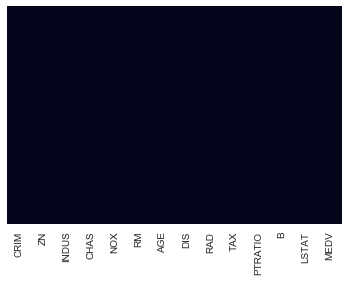

In [9]:
import seaborn as sns
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False)

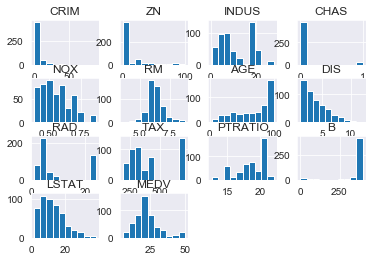

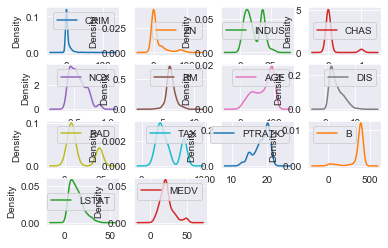

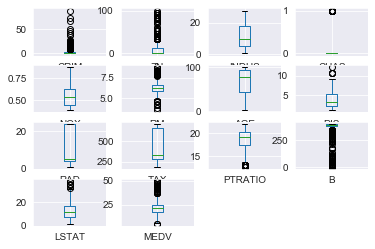

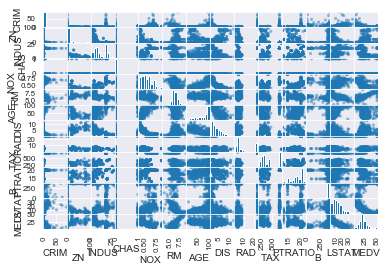

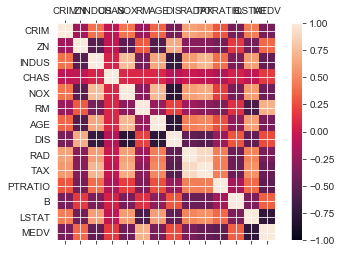

In [10]:
# Data visualizations

# histograms
dataset.hist()
plt.show()
# density
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False)
plt.show()
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

# scatter plot matrix
scatter_matrix(dataset)
plt.show()
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [11]:
# descriptions, change precision to 2 places
pandas.set_option('precision', 2)
print(dataset.describe())


           CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS  \
count  5.06e+02  506.00  506.00  506.00  506.00  506.00  506.00  506.00   
mean   3.61e+00   11.36   11.14    0.07    0.55    6.28   68.57    3.80   
std    8.60e+00   23.32    6.86    0.25    0.12    0.70   28.15    2.11   
min    6.32e-03    0.00    0.46    0.00    0.39    3.56    2.90    1.13   
25%    8.20e-02    0.00    5.19    0.00    0.45    5.89   45.02    2.10   
50%    2.57e-01    0.00    9.69    0.00    0.54    6.21   77.50    3.21   
75%    3.68e+00   12.50   18.10    0.00    0.62    6.62   94.07    5.19   
max    8.90e+01  100.00   27.74    1.00    0.87    8.78  100.00   12.13   

          RAD     TAX  PTRATIO       B   LSTAT    MEDV  
count  506.00  506.00   506.00  506.00  506.00  506.00  
mean     9.55  408.24    18.46  356.67   12.65   22.53  
std      8.71  168.54     2.16   91.29    7.14    9.20  
min      1.00  187.00    12.60    0.32    1.73    5.00  
25%      4.00  279.00    17.40  375.38 

In [12]:
# correlation
print(dataset.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  \
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58   
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31   
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72   
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04   
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67   
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29   
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51   
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53   
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 -0.49  1.00e+00  0.91   
TAX      0.58 -0.31   0.72 -3.56e-02  0.67 -0.29  0.51 -0.53  9.10e-01  1.00   
PTRATIO  0.29 -0.39   0.38 -1.22e-01  0.19 -0.36  0.26 -0.23  4.65e-01  0.46   
B       -0.39  0.18  -0.36  4.88e-02 -0.

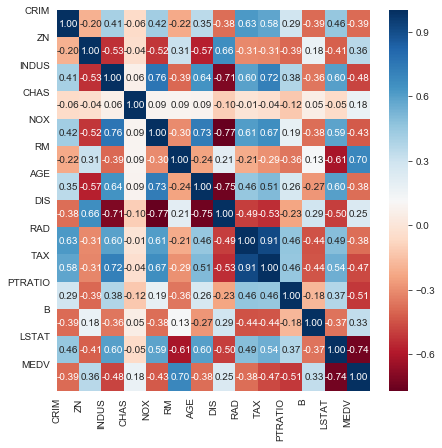

In [13]:
#correlation matrix
import seaborn as sns

corrmat = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(7, 7))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corrmat, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corrmat.columns)), corrmat.columns);
#Apply yticks
plt.yticks(range(len(corrmat.columns)), corrmat.columns)
#show plot
plt.show()

In [14]:
correlations = corrmat['MEDV'].sort_values(ascending = False)
features = correlations.index[0:14]
features

Index(['MEDV', 'RM', 'ZN', 'B', 'DIS', 'CHAS', 'AGE', 'RAD', 'CRIM', 'NOX',
       'TAX', 'INDUS', 'PTRATIO', 'LSTAT'],
      dtype='object')

In [15]:
correlations

MEDV       1.00
RM         0.70
ZN         0.36
B          0.33
DIS        0.25
CHAS       0.18
AGE       -0.38
RAD       -0.38
CRIM      -0.39
NOX       -0.43
TAX       -0.47
INDUS     -0.48
PTRATIO   -0.51
LSTAT     -0.74
Name: MEDV, dtype: float64

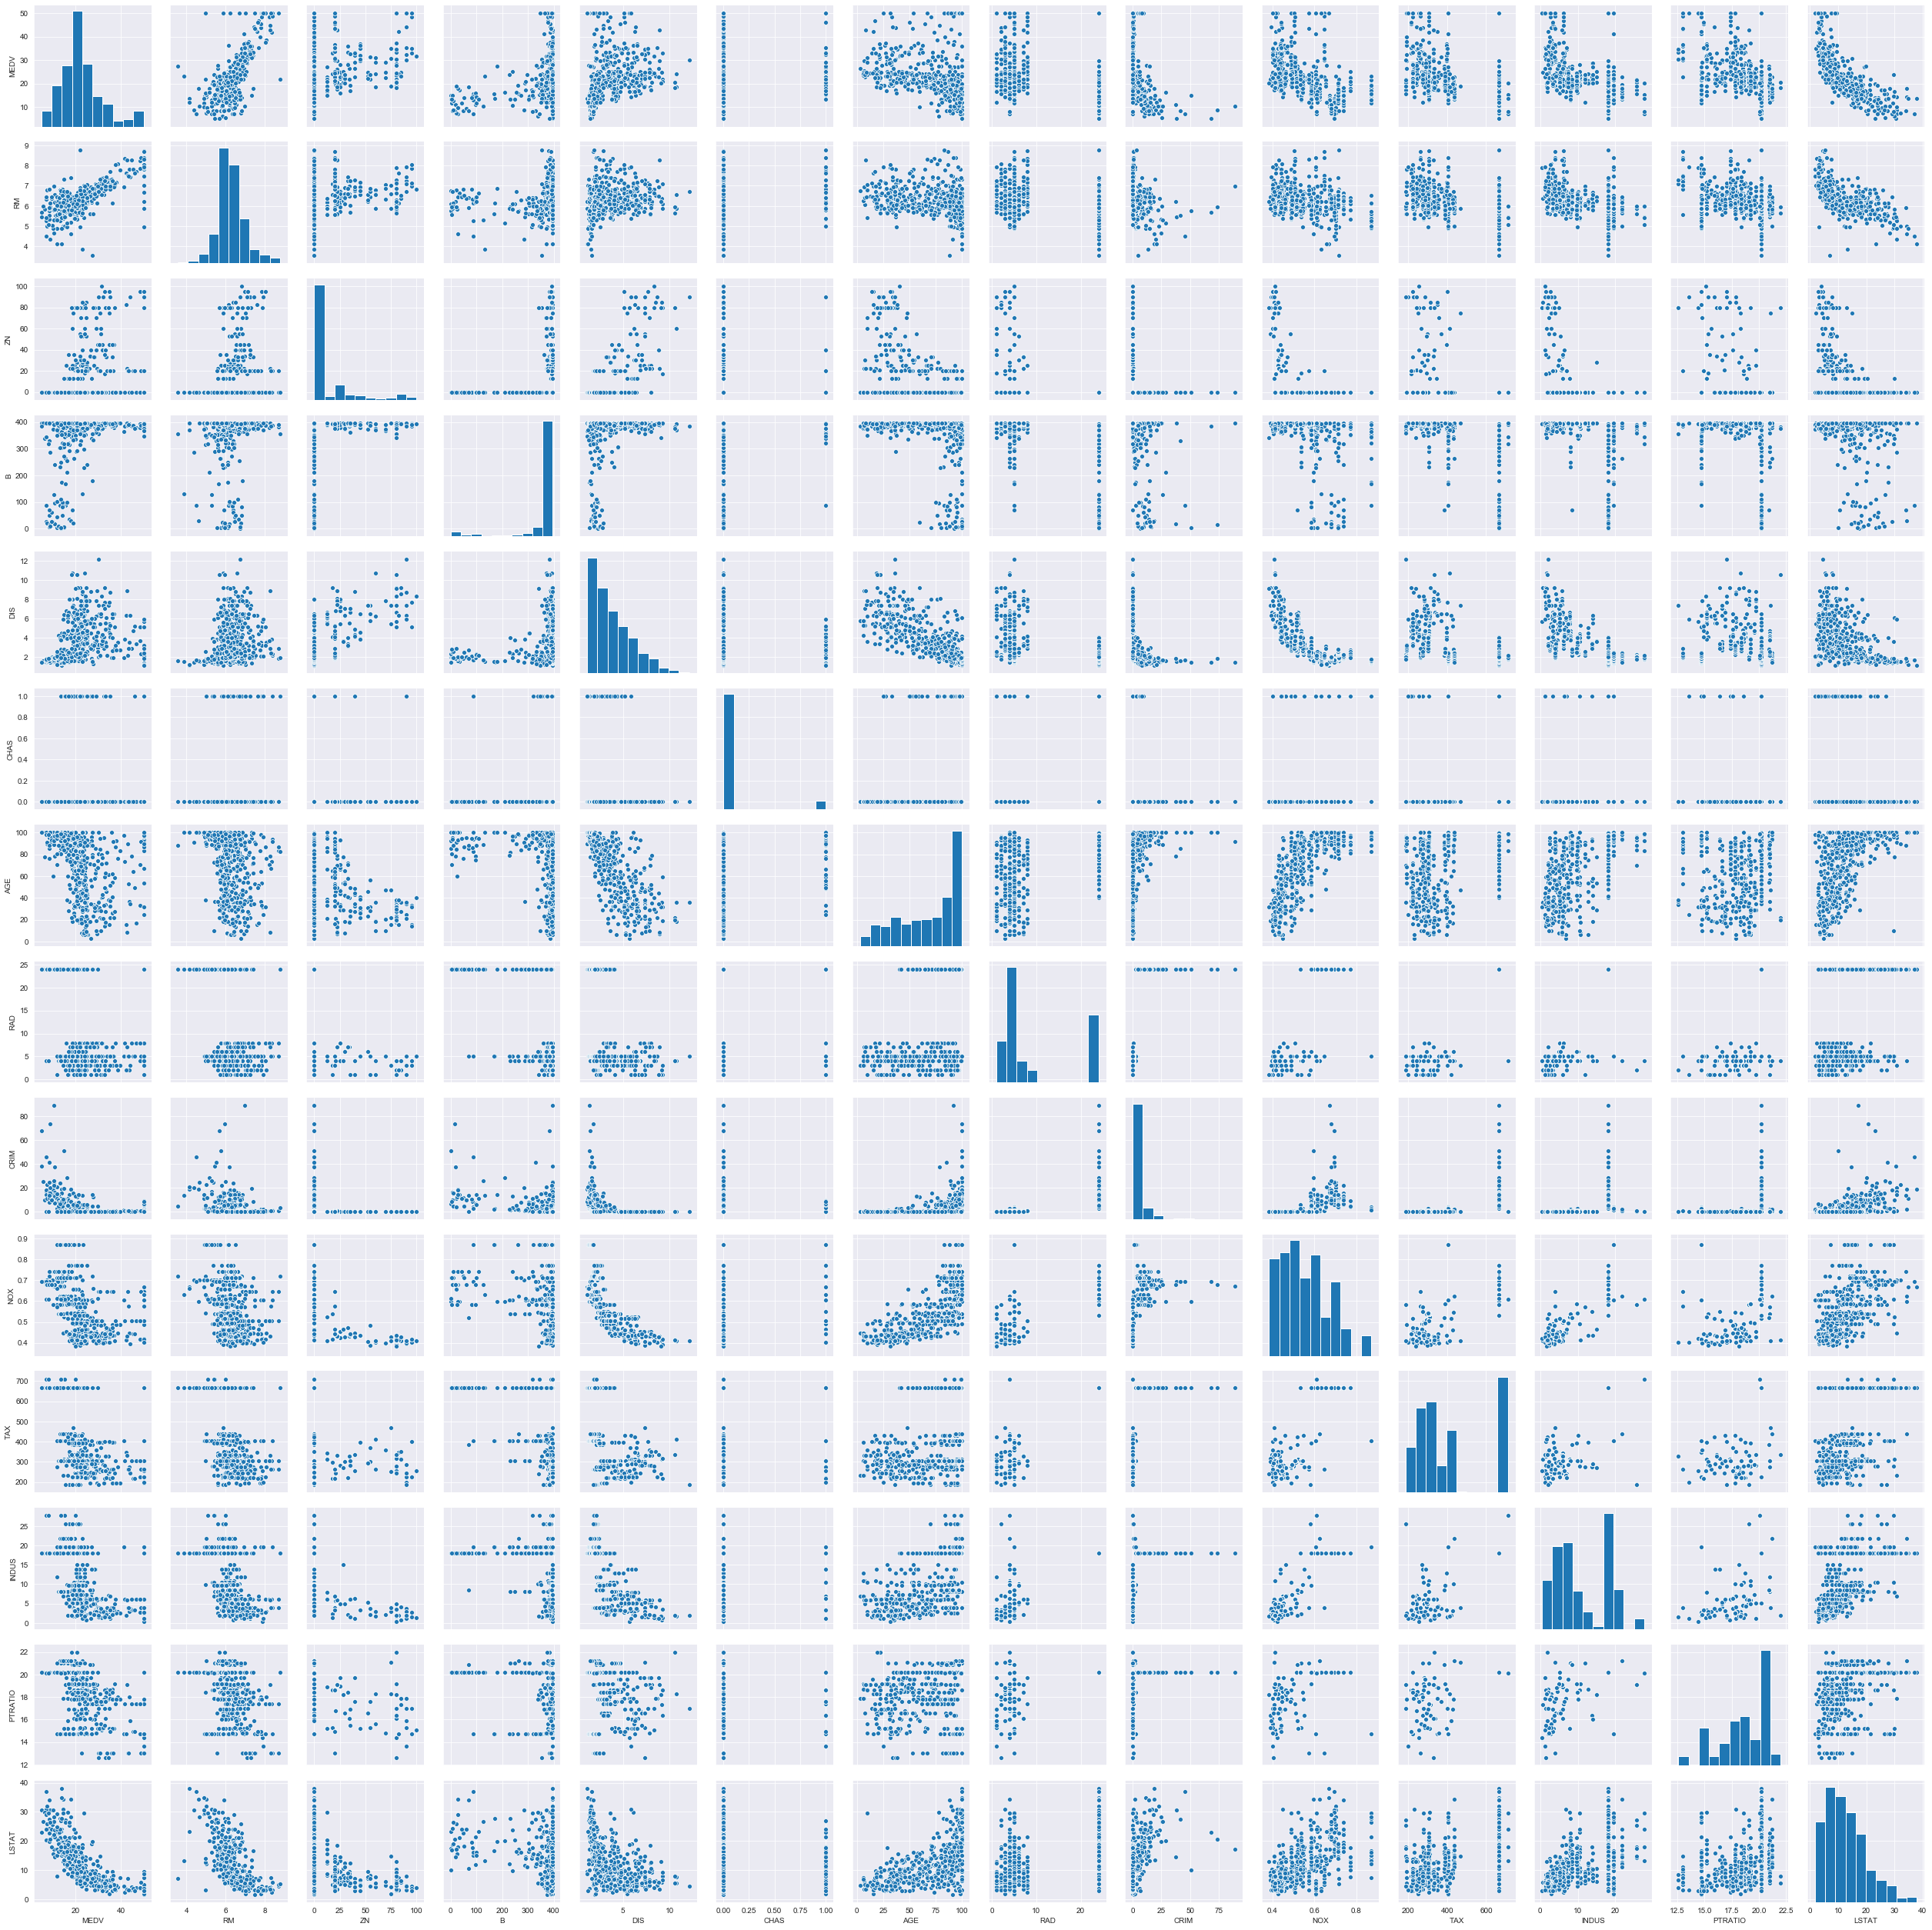

In [16]:
sns.pairplot(dataset[features], size = 2.5)
plt.show()

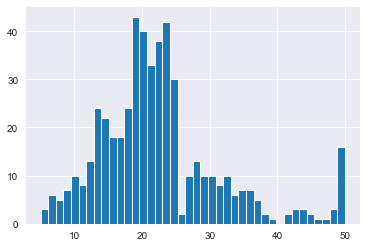

In [17]:
#histogram
dataset['MEDV'].hist(bins = 40)

In [18]:
#skewness & kurtosis
print('Skewness: %f' % dataset['MEDV'].skew())
print('Kurtosis: %f' % dataset['MEDV'].kurt())

Skewness: 1.108098
Kurtosis: 1.495197


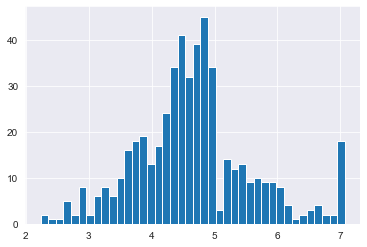

In [19]:
import numpy as np
(np.sqrt(dataset['MEDV'])).hist(bins = 40)

In [20]:
#skewness & kurtosis
print('Skewness: %f' % np.sqrt(dataset['MEDV']).skew())
print('Kurtosis: %f' % np.sqrt(dataset['MEDV']).kurt())

Skewness: 0.438935
Kurtosis: 0.590550


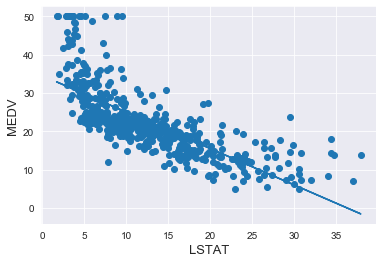

In [21]:
import numpy as np

fig, ax = plt.subplots()
ax.scatter(x = dataset['LSTAT'], y = dataset['MEDV'])
plt.ylabel('MEDV', fontsize=13)
plt.xlabel('LSTAT', fontsize=13)

m, b = np.polyfit(dataset['LSTAT'], dataset['MEDV'], 1)
plt.plot(dataset['LSTAT'], m*dataset['LSTAT'] + b)

plt.show()

In [22]:
dataset['MEDV'] = np.sqrt(dataset['MEDV'])

In [23]:
columns = dataset.columns
columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

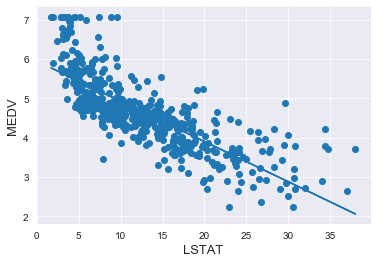

In [24]:
import numpy as np

fig, ax = plt.subplots()
ax.scatter(x = dataset['LSTAT'], y = dataset['MEDV'])
plt.ylabel('MEDV', fontsize=13)
plt.xlabel('LSTAT', fontsize=13)

m, b = np.polyfit(dataset['LSTAT'], dataset['MEDV'], 1)
plt.plot(dataset['LSTAT'], m*dataset['LSTAT'] + b)

plt.show()

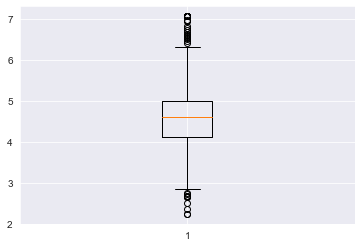

In [25]:
# Box plot
plt.boxplot(dataset['MEDV'])
plt.show()

In [26]:
# Understanding the Target MEDV .
dataset.MEDV.value_counts()

7.07    16
5.00     8
4.66     7
4.69     7
4.81     7
        ..
5.77     1
5.31     1
3.77     1
3.29     1
4.85     1
Name: MEDV, Length: 229, dtype: int64

In [27]:
# Outliers handleing
# Here we will  cap the outlier for above 95th percentile to 95th percentile and  below 5th percentile to 5th percentile

dataset.loc[dataset['MEDV']>dataset['MEDV'].quantile(0.95),['MEDV']]=dataset['MEDV'].quantile(0.95)

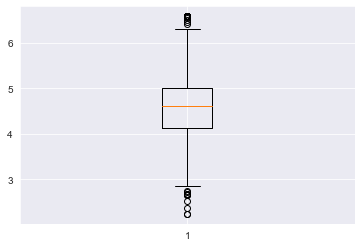

In [28]:
# Box plot
plt.boxplot(dataset['MEDV'])
plt.show()

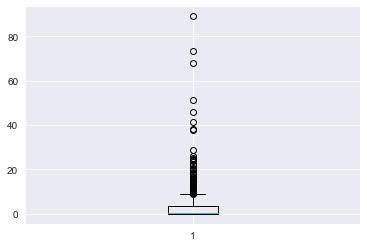

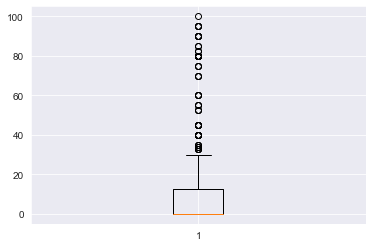

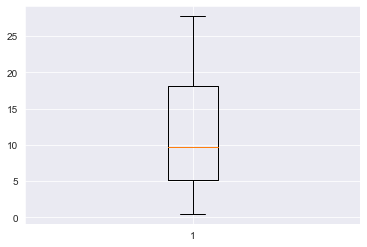

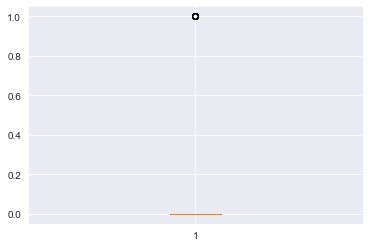

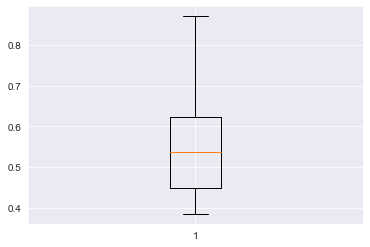

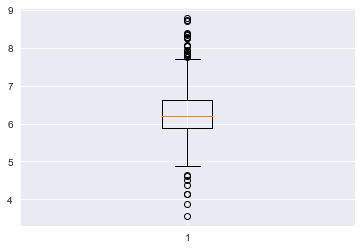

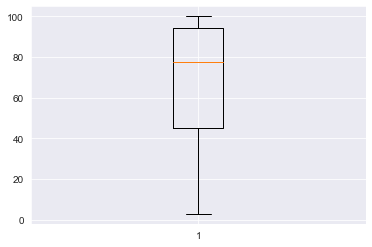

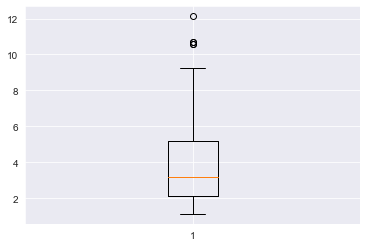

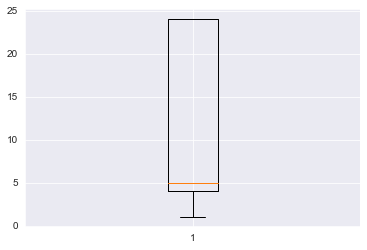

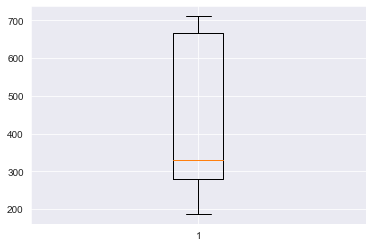

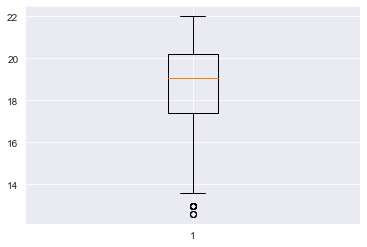

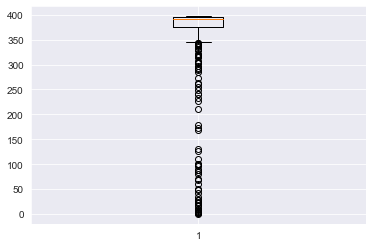

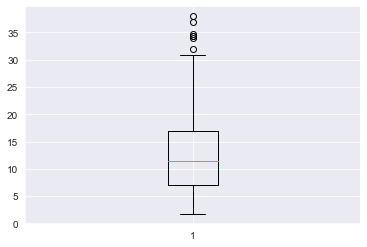

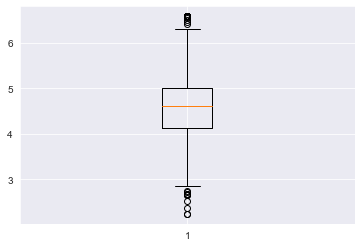

In [29]:
# Box plot ( All Data)
for cname in columns:
    plt.boxplot(dataset[cname])
    plt.show()

In [30]:
# # Outliers handleing (All Data)
# # Here we will  cap the outlier for above 95th percentile to 95th percentile and  below 5th percentile to 5th percentile

for cname in columns:
    dataset.loc[dataset[cname]>dataset[cname].quantile(0.95),[cname]]=dataset[cname].quantile(0.95)


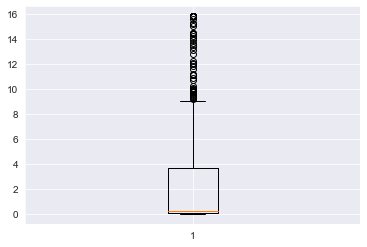

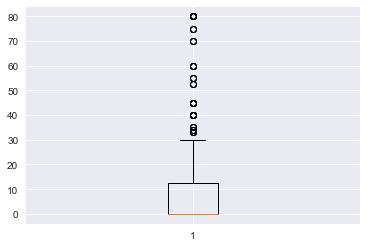

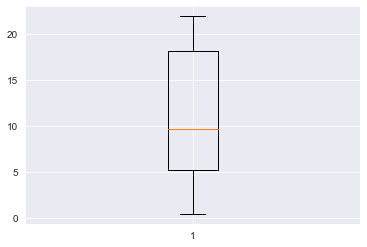

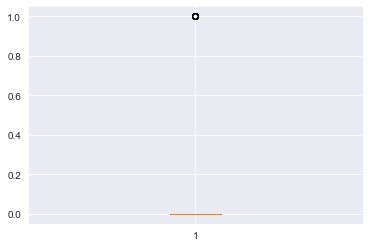

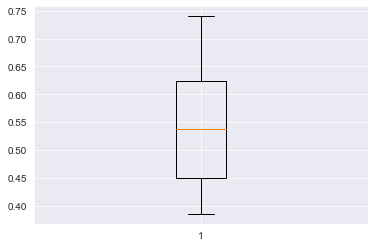

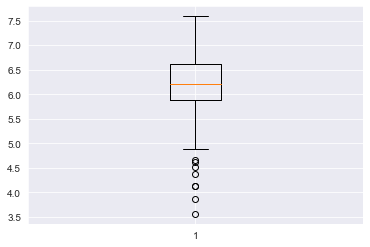

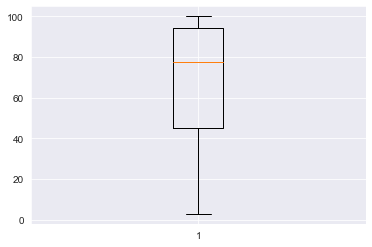

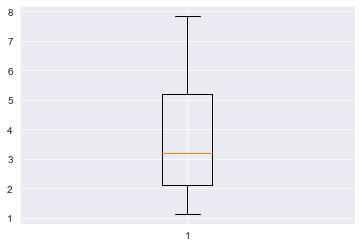

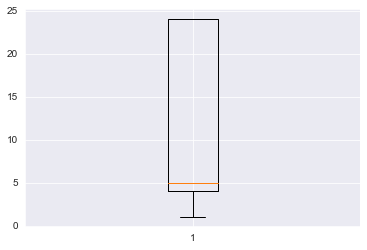

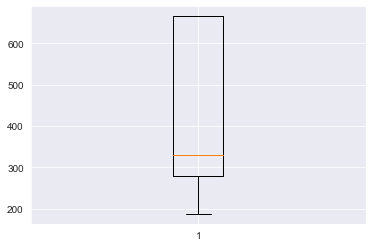

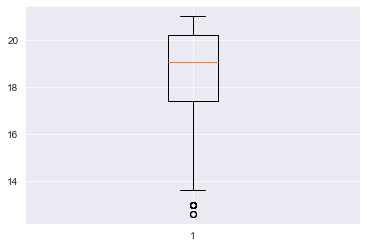

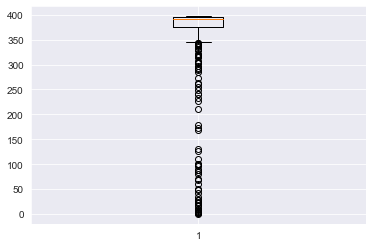

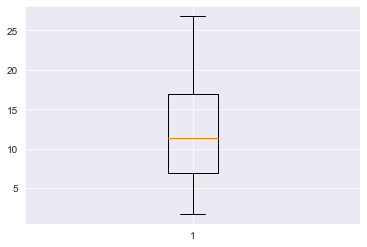

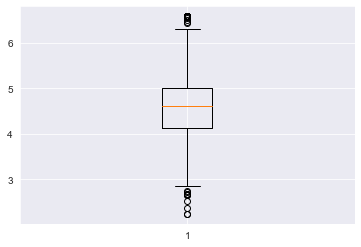

In [31]:
# Box plot ( All Data)
for cname in columns:
    plt.boxplot(dataset[cname])
    plt.show()

In [32]:
X = dataset.iloc[:, 0:13].values
Y = dataset.iloc[:, 13].values.reshape(-1,1)

In [33]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = 0.3, random_state = 25)

In [34]:
Y.shape

(506, 1)

In [35]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_validation.shape)
print("Shape of y_train: ",Y_train.shape)
print("Shape of y_test",Y_validation.shape)

Shape of X_train:  (354, 13)
Shape of X_test:  (152, 13)
Shape of y_train:  (354, 1)
Shape of y_test (152, 1)


In [36]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

# Evaluate Baseline Models
# Test options and evaluation metric
models = []
models.append(('LR', LinearRegression()))
models.append(('Ridge',Ridge()))
models.append(('LASSO', Lasso()))
models.append(('SVR', SVR()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))

In [37]:
models

[('LR', LinearRegression()),
 ('Ridge', Ridge()),
 ('LASSO', Lasso()),
 ('SVR', SVR()),
 ('DT', DecisionTreeRegressor()),
 ('RF', RandomForestRegressor())]

In [38]:
models[0][1]

LinearRegression()

In [39]:
type(models[0][1])

sklearn.linear_model._base.LinearRegression

In [40]:
# evaluate each model in turn

num_folds = 10
# num_instances = len(X_train)
seed = 7
# scoring = 'neg_mean_squared_error'
scoring='r2'

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train,scoring=scoring, cv=num_folds)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.763961 (0.074303)
Ridge: 0.755567 (0.083054)
LASSO: 0.590966 (0.106386)
SVR: 0.346972 (0.143450)
DT: 0.690413 (0.112514)
RF: 0.843228 (0.062988)


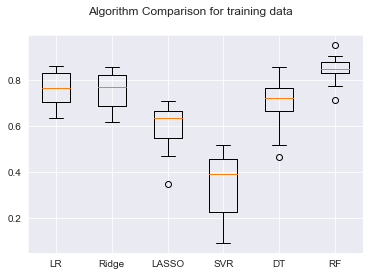

In [41]:
# Compare Algorithms for training data
fig = plt.figure()
fig.suptitle('Algorithm Comparison for training data')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [42]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_validation, Y_validation, cv=num_folds,scoring='r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.693089 (0.235884)
Ridge: 0.697417 (0.214483)
LASSO: 0.635702 (0.111102)
SVR: 0.294025 (0.211090)
DT: 0.662890 (0.082653)
RF: 0.783489 (0.110133)


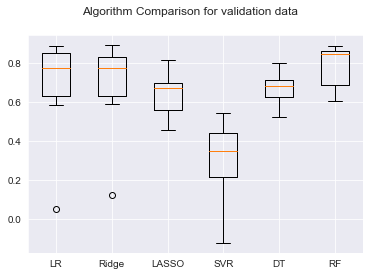

In [43]:
# Compare Algorithms for validation data
fig = plt.figure()
fig.suptitle('Algorithm Comparison for validation data')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [44]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledRidge', Pipeline([('Scaler', StandardScaler()),('Ridge', Ridge())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
pipelines.append(('ScaledDT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeRegressor())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.763961 (0.074303)
ScaledRidge: 0.764154 (0.074182)
ScaledSVR: 0.818547 (0.084997)
ScaledDT: 0.670072 (0.112791)
ScaledRF: 0.837816 (0.064973)


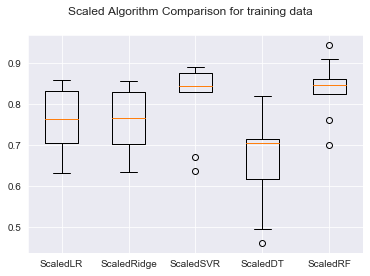

In [45]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison for training data')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [46]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledRidge', Pipeline([('Scaler', StandardScaler()),('Ridge', Ridge())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
pipelines.append(('ScaledDT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeRegressor())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_validation, Y_validation, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.693089 (0.235884)
ScaledRidge: 0.694343 (0.240183)
ScaledSVR: 0.737845 (0.126478)
ScaledDT: 0.542379 (0.268871)
ScaledRF: 0.785519 (0.108473)


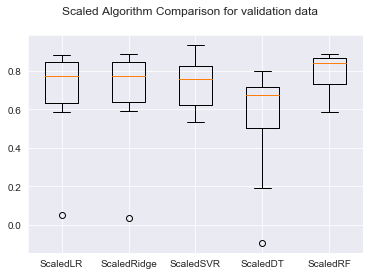

In [47]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison for validation data')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [48]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values.reshape(-1,1)

In [49]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 25)

4. Regression Models

Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [51]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the valid set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the valid set results
y_pred_linear_valid = regressor_linear.predict(X_valid)
r2_score_linear_valid = r2_score(y_valid, y_pred_linear_valid)

# Predicting RMSE the valid set results
rmse_linear = (np.sqrt(mean_squared_error(y_valid, y_pred_linear_valid)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (valid): ', r2_score_linear_valid)
print("RMSE: ", rmse_linear)

CV:  0.7639609753763297
R2_score (train):  0.801227713900893
R2_score (valid):  0.7900082206283578
RMSE:  0.38396584485723223


Ridge Regression

In [52]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)


Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=3.8))])

In [53]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the valid set results
cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the valid set results
y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the valid set results
y_pred_ridge_valid = ridge_pipe.predict(X_valid)
r2_score_ridge_valid = r2_score(y_valid, y_pred_ridge_valid)

# Predicting RMSE the valid set results
rmse_ridge = (np.sqrt(mean_squared_error(y_valid, y_pred_ridge_valid)))
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (valid): ', r2_score_ridge_valid)
print("RMSE: ", rmse_ridge)

CV:  0.8230018763590202
R2_score (train):  0.9201112372774648
R2_score (valid):  0.8847337396733062
RMSE:  0.2844739799690965


Lasso Regression

In [54]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.012, fit_intercept=True, max_iter=3000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=0.012, max_iter=3000))])

In [55]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the valid set results
y_pred_lasso_train = lasso_pipe.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the valid set results
y_pred_lasso_valid = lasso_pipe.predict(X_valid)
r2_score_lasso_valid = r2_score(y_valid, y_pred_lasso_valid)

# Predicting RMSE the valid set results
rmse_lasso = (np.sqrt(mean_squared_error(y_valid, y_pred_lasso_valid)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (valid): ', r2_score_lasso_valid)
print("RMSE: ", rmse_lasso)

CV:  0.8147772581106094
R2_score (train):  0.8806390312869613
R2_score (valid):  0.8612478329221713
RMSE:  0.3121126238144314


Support Vector Regression

In [56]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X_train)
y_scaled = sc_y.fit_transform(y_train.reshape(-1,1))

In [57]:
# Fitting the SVR Model to the dataset
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf', gamma = 'scale')
regressor_svr.fit(X_scaled, y_scaled.ravel())

SVR()

In [58]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_svr = cross_val_score(estimator = regressor_svr, X = X_scaled, y = y_scaled.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_svr_train = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_train)))
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

# Predicting R2 Score the valid set results
y_pred_svr_valid = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_valid)))
r2_score_svr_valid = r2_score(y_valid, y_pred_svr_valid)

# Predicting RMSE the valid set results
rmse_svr = (np.sqrt(mean_squared_error(y_valid, y_pred_svr_valid)))
print('CV: ', cv_svr.mean())
print('R2_score (train): ', r2_score_svr_train)
print('R2_score (valid): ', r2_score_svr_valid)
print("RMSE: ", rmse_svr)


CV:  0.8172122059999672
R2_score (train):  0.8915003569566082
R2_score (valid):  0.8659435092271679
RMSE:  0.3067858824400015


Decision Tree Regression

In [59]:
# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [60]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the valid set results
y_pred_dt_valid = regressor_dt.predict(X_valid)
r2_score_dt_valid = r2_score(y_valid, y_pred_dt_valid)

# Predicting RMSE the valid set results
rmse_dt = (np.sqrt(mean_squared_error(y_valid, y_pred_dt_valid)))
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (valid): ', r2_score_dt_valid)
print("RMSE: ", rmse_dt)

CV:  0.6935808522289664
R2_score (train):  1.0
R2_score (valid):  0.6807027936606158
RMSE:  0.4734662280817647


Random Forest Regression 

In [61]:
# Fitting the Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor_rf.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=500, random_state=0)

In [62]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = regressor_rf, X = X_scaled, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the valid set results
y_pred_rf_valid = regressor_rf.predict(X_valid)
r2_score_rf_valid = r2_score(y_valid, y_pred_rf_valid)

# Predicting RMSE the valid set results
rmse_rf = (np.sqrt(mean_squared_error(y_valid, y_pred_rf_valid)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (valid): ', r2_score_rf_valid)
print("RMSE: ", rmse_rf)

CV:  0.8419473650881464
R2_score (train):  0.9789183027716319
R2_score (valid):  0.8758319136132371
RMSE:  0.29525444276523855


#Stacking models

#Simplest Stacking approach : Averaging base models

In [63]:
Models_train_Predictions = pd.DataFrame(y_pred_linear_train, columns=['Linear Regression'])
Models_train_Predictions['Ridge Regression'] = y_pred_ridge_train
Models_train_Predictions['Lasso Regression'] = y_pred_lasso_train
Models_train_Predictions['Support Vector Regression'] = y_pred_svr_train
Models_train_Predictions['Decision Tree Regression'] = y_pred_dt_train
Models_train_Predictions['Random Forest Regression'] = y_pred_rf_train
Models_train_Predictions['Real Values'] = y_train
Models_train_Predictions.index += 1
Models_train_Predictions

,Linear Regression,Ridge Regression,Lasso Regression,Support Vector Regression,Decision Tree Regression,Random Forest Regression,Real Values
1,5.77,5.89,5.84,5.93,5.81,5.78,5.81
2,4.30,4.23,4.29,4.29,4.27,4.34,4.27
3,3.49,3.79,3.89,3.76,3.56,3.67,3.56
4,4.51,4.19,4.30,4.35,4.31,4.36,4.31
5,5.76,5.51,5.52,5.49,5.34,5.45,5.34
...,...,...,...,...,...,...,...
350,4.27,4.25,4.29,4.29,4.45,4.44,4.45
351,3.54,3.69,3.65,3.86,3.95,3.86,3.95
352,4.09,4.37,4.23,4.17,3.71,3.79,3.71
353,4.85,4.74,4.82,4.82,4.81,4.77,4.81


In [64]:
Models_valid_Predictions = pd.DataFrame(y_pred_linear_valid, columns=['Linear Regression'])
Models_valid_Predictions['Ridge Regression'] = y_pred_ridge_valid
Models_valid_Predictions['Lasso Regression'] = y_pred_lasso_valid
Models_valid_Predictions['Support Vector Regression'] = y_pred_svr_valid
Models_valid_Predictions['Decision Tree Regression'] = y_pred_dt_valid
Models_valid_Predictions['Random Forest Regression'] = y_pred_rf_valid
Models_valid_Predictions['Real Values'] = y_valid
Models_valid_Predictions.index += 1
Models_valid_Predictions.head(5)

,Linear Regression,Ridge Regression,Lasso Regression,Support Vector Regression,Decision Tree Regression,Random Forest Regression,Real Values
1,4.73,4.55,4.36,4.56,4.66,4.48,4.63
2,4.42,4.32,4.40,4.39,4.22,4.43,4.37
3,5.01,4.96,4.99,4.97,4.81,4.85,5.00
4,2.81,2.87,3.09,3.20,2.24,2.66,3.24
5,4.14,4.21,4.17,4.26,3.86,4.29,4.47


5. Measuring the Error

In [65]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_valid, cv_linear.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_valid, cv_ridge.mean()),
          ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_valid, cv_lasso.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_valid, cv_svr.mean()),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_valid, cv_dt.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_valid, cv_rf.mean())   
         ]

Creating a fuction to calculate the cross validation of Averaging Model

In [66]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(valid)', 'Cross-Validation']).sort_values('Cross-Validation', ascending=False)
predict.index = [1,2,3,4,5,6]
predict

,Model,RMSE,R2_Score(training),R2_Score(valid),Cross-Validation
1,Random Forest Regression,0.30,0.98,0.88,0.84
2,Ridge Regression,0.28,0.92,0.88,0.82
3,Support Vector Regression,0.31,0.89,0.87,0.82
4,Lasso Regression,0.31,0.88,0.86,0.81
5,Linear Regression,0.38,0.80,0.79,0.76
6,Decision Tree Regression,0.47,1.00,0.68,0.69


Visualizing Model Performance

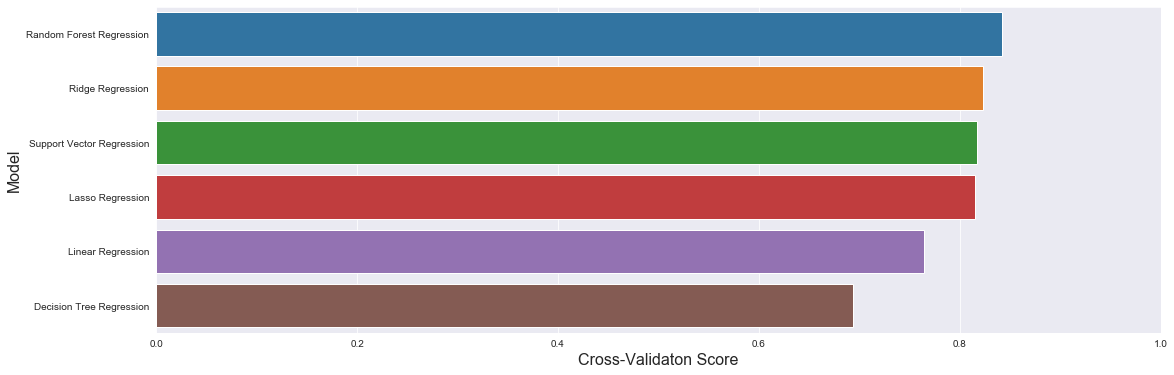

In [67]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)
sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model', size = 16)
axe.set_xlim(0,1.0)
plt.show()

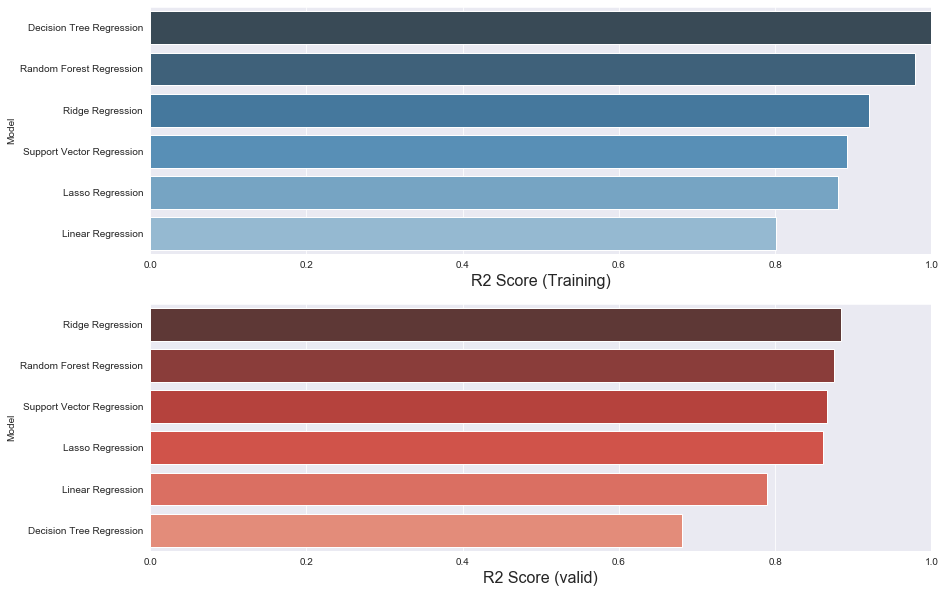

In [68]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

predict.sort_values(by=['R2_Score(valid)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(valid)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('R2 Score (valid)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)

plt.show()

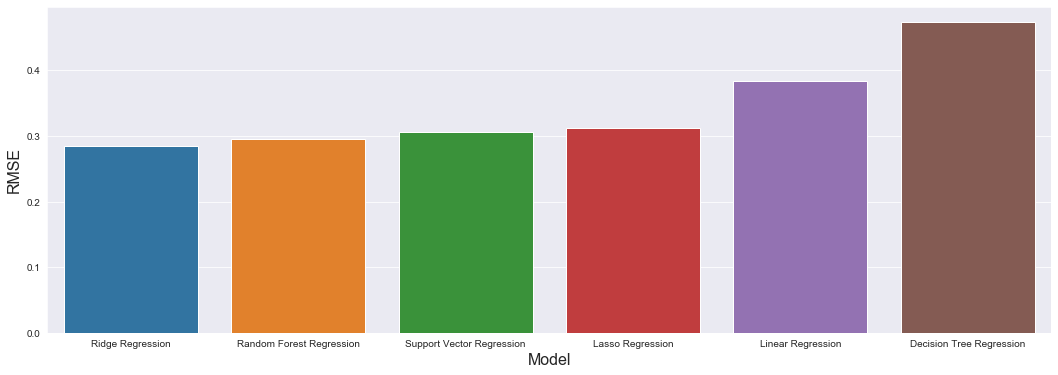

In [69]:
predict.sort_values(by=['RMSE'], ascending=True, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()

FINDING THE KEY VARIABLES USING RANDOM FOREST

In [70]:
Features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
            'PTRATIO', 'B', 'LSTAT']

In [71]:
X = dataset[Features]
Y = dataset['MEDV']

In [72]:
pandas.set_option('precision', 5)

In [73]:
X.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [74]:
Y.head(5)

1    4.89898
2    4.64758
3    5.89067
4    5.77927
5    6.01664
Name: MEDV, dtype: float64

In [75]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = 0.3, random_state = 25)

In [76]:
from sklearn.ensemble import RandomForestRegressor

classifier = RandomForestRegressor()

param_grid = { 
            "n_estimators"      : [100,200,300],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

In [77]:
from sklearn.model_selection import GridSearchCV

gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=param_grid,
                     scoring='r2',
                     cv=5,
                     n_jobs=-1)

grid = GridSearchCV(classifier, param_grid, n_jobs=-1, cv=5)

grid.fit(X_train, Y_train)

print(grid.best_score_ )
print(grid.best_params_)

0.8677921763466914
{'bootstrap': False, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 300}


In [78]:
from sklearn.metrics import r2_score

model = RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_split=2, n_estimators= 200)
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=200)

In [79]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = model, X = X_train, y = Y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf_train = model.predict(X_train)
r2_score_rf_train = r2_score(Y_train, y_pred_rf_train)

# Predicting R2 Score the valid set results
y_pred_rf_valid = model.predict(X_validation)
r2_score_rf_valid = r2_score(Y_validation, y_pred_rf_valid)

# Predicting RMSE the valid set results
rmse_rf = (np.sqrt(mean_squared_error(Y_validation, y_pred_rf_valid)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (valid): ', r2_score_rf_valid)
print("RMSE: ", rmse_rf)

CV:  0.8643304787434765
R2_score (train):  1.0
R2_score (valid):  0.8826155945964143
RMSE:  0.28707584343055775


In [80]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = Features,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_importances 

,importance
LSTAT,0.24448
RM,0.23558
NOX,0.11496
INDUS,0.08693
CRIM,0.06846
PTRATIO,0.06082
DIS,0.06072
TAX,0.03840
AGE,0.03335
B,0.02529


In [81]:
feature_importances.index

Index(['LSTAT', 'RM', 'NOX', 'INDUS', 'CRIM', 'PTRATIO', 'DIS', 'TAX', 'AGE',
       'B', 'RAD', 'ZN', 'CHAS'],
      dtype='object')

In [82]:
Key_Features = ['RM', 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'CRIM']

In [83]:
model.fit(X_train[Key_Features], Y_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=200)

In [84]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = model, X = X_train[Key_Features], y = Y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf_train = model.predict(X_train[Key_Features])
r2_score_rf_train = r2_score(Y_train, y_pred_rf_train)

# Predicting R2 Score the valid set results
y_pred_rf_valid = model.predict(X_validation[Key_Features])
r2_score_rf_valid = r2_score(Y_validation, y_pred_rf_valid)

# Predicting RMSE the valid set results
rmse_rf = (np.sqrt(mean_squared_error(Y_validation, y_pred_rf_valid)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (valid): ', r2_score_rf_valid)
print("RMSE: ", rmse_rf)

CV:  0.8413295715986593
R2_score (train):  1.0
R2_score (valid):  0.8482431088248688
RMSE:  0.3264116552813439
